---

## **Ciclo Diurno de Relâmpagos**

---

**OBJETIVO:** Este código plota a quantidade de relâmpagos por hora e a cada 10 min para um determinado dia com os dados da rede EarthNetwork.

---

**DADOS DE ENTRADA**:

1.   Arquivos ASCII de relâmpagos da rede EarthNetwork: **pulse_CEMADEN_2016-12-18.txt.gz**

---

**DADOS DE SAÍDA:**


1.   Figura do ciclo diurno (relâmpagos por hora)
2.   Figura do ciclo a cada 10 min de relâmpagos

---
**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Importa funções
4.   Leitura do arquivo de relâmpagos
5.   Seleciona os relâmpagos dentro da região de estudo
6.   Plota figura de relâmpagos por hora
7.   Plota figura de relâmpagos a cada 10 min

---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças:
    - 1. Caminho do seu drive. Mudar em: **3° Passo: Definindo caminho do drive**
    - 2. Mudar o nome do arquivo de relâmpagos. Mudar em: **4° Passo: Leitura dos arquivos**
    - 3. Definir as latitudes/longitudes para limitação espacial. Mudar em:  **5° Passo: Seleciona os raios dentro da região**
    - 4. Definir a data inicial e final para limitação temporal. Mudar em: **2) FIGURA POR MINUTO**

---
- **Realizado por:** Enrique V. Mattos - 11/12/2021
- **Atualizado por:** Enrique V. Mattos - 20/06/2023


# **1° Passo:** Instalando as bibliotecas

In [1]:
!pip install -q proplot

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário para poder usar sem problemas o `Proplot` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

# **2° Passo:** Importando bibliotecas

In [4]:
import pandas as pd
import proplot as pplt
import numpy as np

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

# **3° Passo:** Montando drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4° Passo:** Definindo caminho do drive

In [7]:
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/9_lightning_groundnetwork/'

In [8]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **5° Passo:** Leitura dos arquivos

In [47]:
df = pd.read_csv(f'{dir}input/pulse_CEMADEN_2016-12-18.txt.gz',
                 delimiter='\s+')

In [48]:
df

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,IC,2016,12,18,0,0,11.555,-26.727706,-52.743418,-5738,16763,5,2
1,99999999,CG,2016,12,18,0,0,11.593,-26.750973,-52.744636,-21903,0,8,2
2,99999999,IC,2016,12,18,0,0,32.662,-26.738673,-52.569796,-8876,16206,7,1
3,99999999,IC,2016,12,18,0,0,37.053,-21.945242,-53.847038,11103,16069,8,2
4,99999999,IC,2016,12,18,0,0,37.063,-21.941922,-53.849979,12624,19112,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75024,99999999,IC,2016,12,18,23,59,58.478,-22.304956,-46.052855,-5551,11725,8,1
75025,99999999,IC,2016,12,18,23,59,58.902,-29.241452,-56.513615,6331,15391,5,1
75026,99999999,CG,2016,12,18,23,59,58.924,-27.673718,-60.966353,-16630,0,5,1
75027,99999999,CG,2016,12,18,23,59,59.260,-26.224939,-62.716808,-18684,0,10,2


# **6° Passo:** Seleciona os raios dentro da região

In [49]:
# latitudes e longitudes do quadrado que delimita a região
lonmin, lonmax, latmin, latmax = -44.50, -43.60, -20.40, -19.27

In [50]:
# seleciona os relâmpagos dentro da região que foi pre-definida
df_regiao = df[ (df['lat'] >= latmin) & (df['lat'] <= latmax) & (df['lon'] >= lonmin) & (df['lon'] <= lonmax) ]

In [51]:
# exibe a nova tabela
df_regiao

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
703,99999999,IC,2016,12,18,0,42,40.453,-20.135455,-43.609380,4335,4202,5,1
36776,99999999,CG,2016,12,18,18,2,35.559,-19.633637,-43.869737,-12676,0,11,1
42186,99999999,IC,2016,12,18,18,49,2.452,-19.599488,-43.985802,9426,19911,13,1
42674,99999999,CG,2016,12,18,18,53,11.202,-19.576888,-44.034907,-6005,0,5,2
42675,99999999,CG,2016,12,18,18,53,11.332,-19.572648,-44.066410,-4783,0,10,2
43000,99999999,CG,2016,12,18,18,55,58.975,-19.648769,-44.077048,-39584,0,14,4
43526,99999999,IC,2016,12,18,19,0,26.887,-19.659818,-43.972563,3363,19378,5,1
43656,99999999,IC,2016,12,18,19,1,34.146,-19.612096,-44.058078,5409,18805,6,1
43658,99999999,IC,2016,12,18,19,1,34.168,-19.584534,-44.058983,4774,4482,6,1
43757,99999999,IC,2016,12,18,19,2,26.697,-19.621252,-44.005121,5381,17960,5,1


#**PARTE 1**: FIGURA POR HORA

##**Agrupa os dados por hora**

In [52]:
df_regiao.head()

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
703,99999999,IC,2016,12,18,0,42,40.453,-20.135455,-43.609380,4335,4202,5,1
36776,99999999,CG,2016,12,18,18,2,35.559,-19.633637,-43.869737,-12676,0,11,1
42186,99999999,IC,2016,12,18,18,49,2.452,-19.599488,-43.985802,9426,19911,13,1
42674,99999999,CG,2016,12,18,18,53,11.202,-19.576888,-44.034907,-6005,0,5,2
42675,99999999,CG,2016,12,18,18,53,11.332,-19.572648,-44.066410,-4783,0,10,2


In [53]:
raios_hora = df_regiao.groupby('hor').count()['ano']

In [54]:
raios_hora

hor
0     1
18    5
19    7
22    2
Name: ano, dtype: int64

In [55]:
horas = np.arange(0, 24, 1)
horas

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

##**As horas do dia que não tinha nada, o fill_value completou com 0**

In [56]:
raios_hora

hor
0     1
18    5
19    7
22    2
Name: ano, dtype: int64

In [57]:
raios_hora = raios_hora.reindex(horas, fill_value=0)

In [58]:
raios_hora

hor
0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    5
19    7
20    0
21    0
22    2
23    0
Name: ano, dtype: int64

##**Coloca os dados num DataFrame**

In [59]:
df = pd.DataFrame()
df['qte_relampagos'] = raios_hora
df

,qte_relampagos
hor,
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


##**Plota figura**

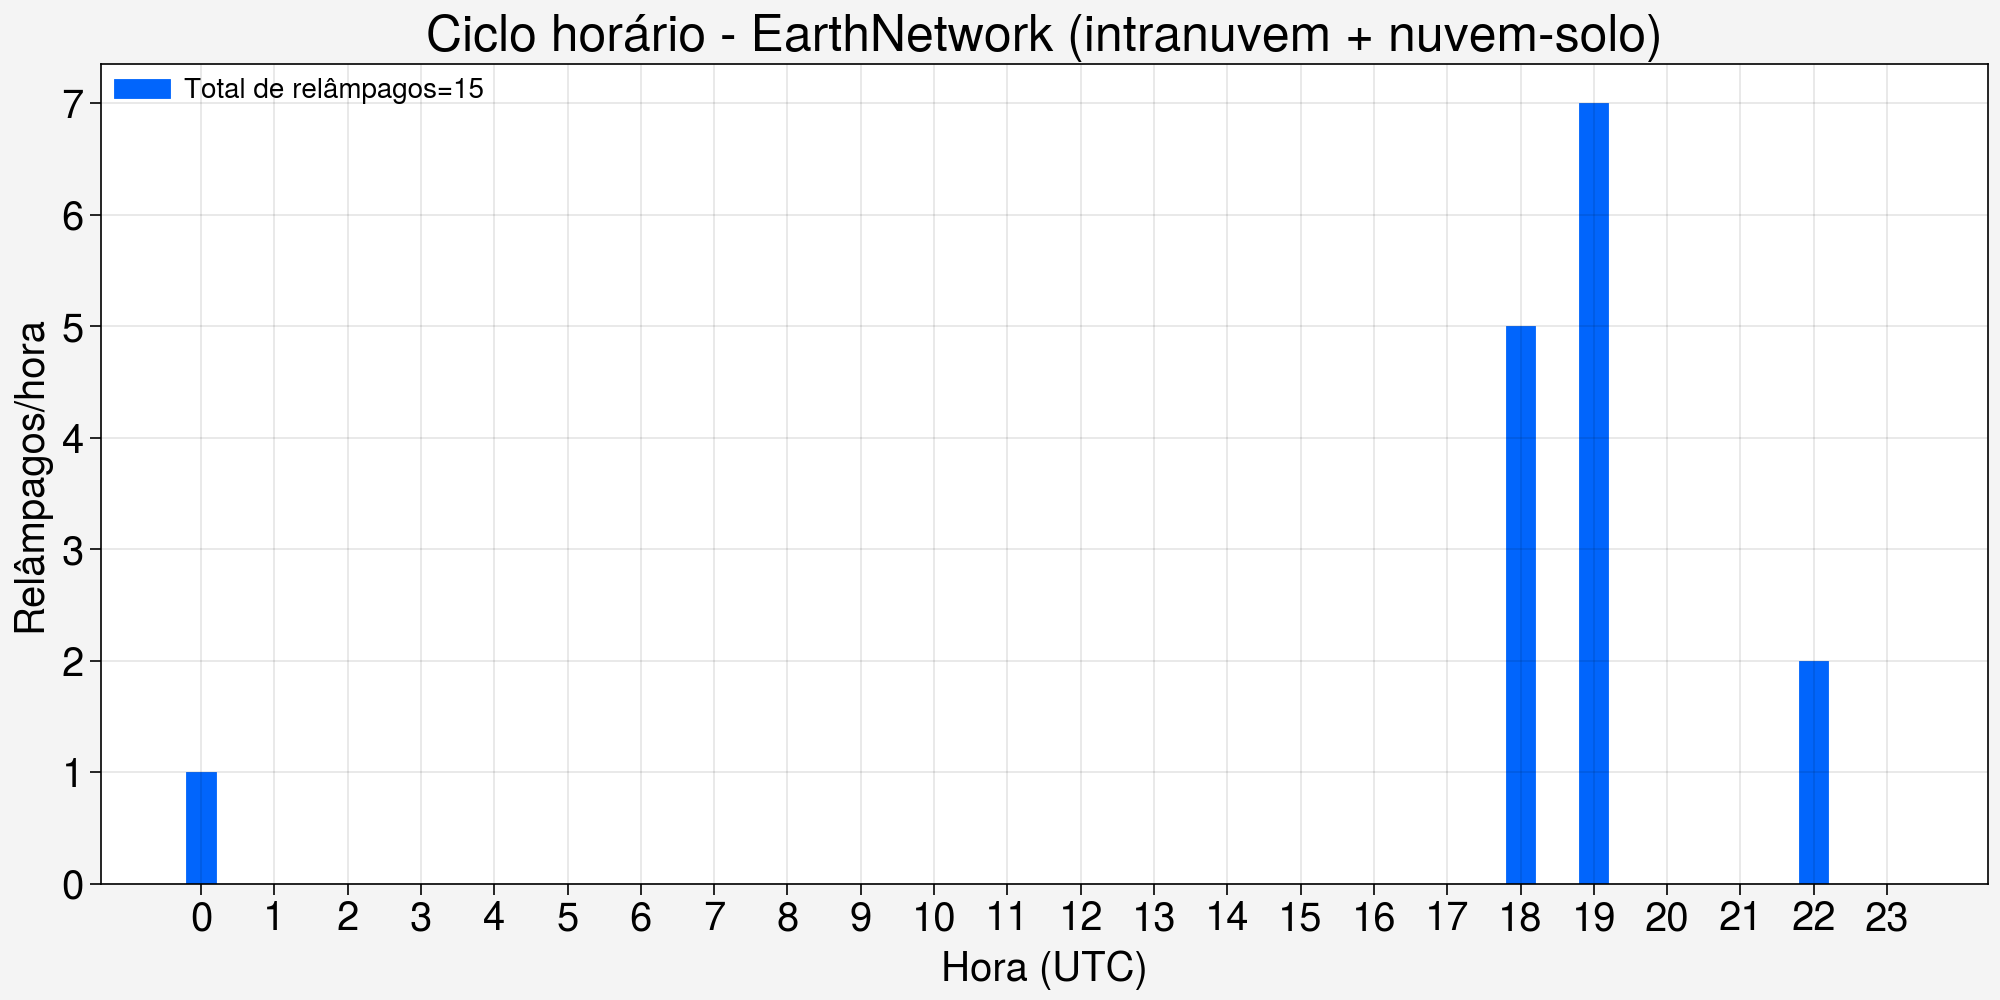

In [60]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5))

# plota gráfico de barras
ax.bar(pplt.arange(0, 23, 1),
       df['qte_relampagos'],
       color='bright blue',
       width=0.4,
       label=f"Total de relâmpagos={df['qte_relampagos'].sum()}")

# formatação de eixos etc
ax.format(xticks=pplt.arange(0, 23, 1),
          xticklabels=[str(i) for i in np.arange(0, 24, 1)],
          xlabel='Hora (UTC)', ylabel='Relâmpagos/hora',
          title='Ciclo horário - EarthNetwork (intranuvem + nuvem-solo)',
          xtickminor=False, ytickminor=False,
          small='20px', large='25px')

# Adiona a legenda
ax.legend(ncols=1, frameon=False, loc='ul', prop={'size': 10})

# salva figura
fig.save(f'{dir}output/Fig1_ciclo_por_hora.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
pplt.show()

#**PARTE 2:** FIGURA POR MINUTO

In [61]:
# define o horário inicial e final
data_str_ini = '2016-12-18 18:00'
data_str_end = '2016-12-18 23:00'

In [62]:
df_regiao

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
703,99999999,IC,2016,12,18,0,42,40.453,-20.135455,-43.609380,4335,4202,5,1
36776,99999999,CG,2016,12,18,18,2,35.559,-19.633637,-43.869737,-12676,0,11,1
42186,99999999,IC,2016,12,18,18,49,2.452,-19.599488,-43.985802,9426,19911,13,1
42674,99999999,CG,2016,12,18,18,53,11.202,-19.576888,-44.034907,-6005,0,5,2
42675,99999999,CG,2016,12,18,18,53,11.332,-19.572648,-44.066410,-4783,0,10,2
43000,99999999,CG,2016,12,18,18,55,58.975,-19.648769,-44.077048,-39584,0,14,4
43526,99999999,IC,2016,12,18,19,0,26.887,-19.659818,-43.972563,3363,19378,5,1
43656,99999999,IC,2016,12,18,19,1,34.146,-19.612096,-44.058078,5409,18805,6,1
43658,99999999,IC,2016,12,18,19,1,34.168,-19.584534,-44.058983,4774,4482,6,1
43757,99999999,IC,2016,12,18,19,2,26.697,-19.621252,-44.005121,5381,17960,5,1


##**Transforma a Data em Index**

In [63]:
# Cria dataframe apenas com as datas
df_data = pd.DataFrame({'year': df_regiao['ano'],
                        'month': df_regiao['mes'],
                        'day': df_regiao['dia'],
                        'hour': df_regiao['hor'],
                        'minute': df_regiao['min'],
                        'second': df_regiao['seg']})

# transforma a coluna "data" para formato de data
df_regiao['data'] = pd.to_datetime(df_data)
display(df_regiao)

# elimina colunas desnecessárias
df_regiao.drop(columns=['ano','mes','dia','hor','min','seg'], inplace=True)

# seta a coluna data com o index do dataframe
df_regiao = df_regiao.set_index('data')

# exibe o novo dataframe na tela
df_regiao

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult,data
703,99999999,IC,2016,12,18,0,42,40.453,-20.135455,-43.609380,4335,4202,5,1,2016-12-18 00:42:40.453
36776,99999999,CG,2016,12,18,18,2,35.559,-19.633637,-43.869737,-12676,0,11,1,2016-12-18 18:02:35.559
42186,99999999,IC,2016,12,18,18,49,2.452,-19.599488,-43.985802,9426,19911,13,1,2016-12-18 18:49:02.452
42674,99999999,CG,2016,12,18,18,53,11.202,-19.576888,-44.034907,-6005,0,5,2,2016-12-18 18:53:11.202
42675,99999999,CG,2016,12,18,18,53,11.332,-19.572648,-44.066410,-4783,0,10,2,2016-12-18 18:53:11.332
43000,99999999,CG,2016,12,18,18,55,58.975,-19.648769,-44.077048,-39584,0,14,4,2016-12-18 18:55:58.975
43526,99999999,IC,2016,12,18,19,0,26.887,-19.659818,-43.972563,3363,19378,5,1,2016-12-18 19:00:26.887
43656,99999999,IC,2016,12,18,19,1,34.146,-19.612096,-44.058078,5409,18805,6,1,2016-12-18 19:01:34.146
43658,99999999,IC,2016,12,18,19,1,34.168,-19.584534,-44.058983,4774,4482,6,1,2016-12-18 19:01:34.168
43757,99999999,IC,2016,12,18,19,2,26.697,-19.621252,-44.005121,5381,17960,5,1,2016-12-18 19:02:26.697


,id,tipo,lat,lon,pc(A),alt_ic(m),sens,mult
data,,,,,,,,
2016-12-18 00:42:40.453,99999999,IC,-20.135455,-43.609380,4335,4202,5,1
2016-12-18 18:02:35.559,99999999,CG,-19.633637,-43.869737,-12676,0,11,1
2016-12-18 18:49:02.452,99999999,IC,-19.599488,-43.985802,9426,19911,13,1
2016-12-18 18:53:11.202,99999999,CG,-19.576888,-44.034907,-6005,0,5,2
2016-12-18 18:53:11.332,99999999,CG,-19.572648,-44.066410,-4783,0,10,2
2016-12-18 18:55:58.975,99999999,CG,-19.648769,-44.077048,-39584,0,14,4
2016-12-18 19:00:26.887,99999999,IC,-19.659818,-43.972563,3363,19378,5,1
2016-12-18 19:01:34.146,99999999,IC,-19.612096,-44.058078,5409,18805,6,1
2016-12-18 19:01:34.168,99999999,IC,-19.584534,-44.058983,4774,4482,6,1


In [64]:
# LIMITAÇÃO TEMPORAL: seleciona apenas os relâmpagos que ocorreram num intervalo específico de horário
df_regiao_tempo = df_regiao.loc[data_str_ini : data_str_end]
df_regiao_tempo

,id,tipo,lat,lon,pc(A),alt_ic(m),sens,mult
data,,,,,,,,
2016-12-18 18:02:35.559,99999999,CG,-19.633637,-43.869737,-12676,0,11,1
2016-12-18 18:49:02.452,99999999,IC,-19.599488,-43.985802,9426,19911,13,1
2016-12-18 18:53:11.202,99999999,CG,-19.576888,-44.034907,-6005,0,5,2
2016-12-18 18:53:11.332,99999999,CG,-19.572648,-44.066410,-4783,0,10,2
2016-12-18 18:55:58.975,99999999,CG,-19.648769,-44.077048,-39584,0,14,4
2016-12-18 19:00:26.887,99999999,IC,-19.659818,-43.972563,3363,19378,5,1
2016-12-18 19:01:34.146,99999999,IC,-19.612096,-44.058078,5409,18805,6,1
2016-12-18 19:01:34.168,99999999,IC,-19.584534,-44.058983,4774,4482,6,1
2016-12-18 19:02:26.697,99999999,IC,-19.621252,-44.005121,5381,17960,5,1


##**Reamostra para 10min**

In [65]:
# exibe o DataFrame que será utilizado
df_regiao_tempo

,id,tipo,lat,lon,pc(A),alt_ic(m),sens,mult
data,,,,,,,,
2016-12-18 18:02:35.559,99999999,CG,-19.633637,-43.869737,-12676,0,11,1
2016-12-18 18:49:02.452,99999999,IC,-19.599488,-43.985802,9426,19911,13,1
2016-12-18 18:53:11.202,99999999,CG,-19.576888,-44.034907,-6005,0,5,2
2016-12-18 18:53:11.332,99999999,CG,-19.572648,-44.066410,-4783,0,10,2
2016-12-18 18:55:58.975,99999999,CG,-19.648769,-44.077048,-39584,0,14,4
2016-12-18 19:00:26.887,99999999,IC,-19.659818,-43.972563,3363,19378,5,1
2016-12-18 19:01:34.146,99999999,IC,-19.612096,-44.058078,5409,18805,6,1
2016-12-18 19:01:34.168,99999999,IC,-19.584534,-44.058983,4774,4482,6,1
2016-12-18 19:02:26.697,99999999,IC,-19.621252,-44.005121,5381,17960,5,1


In [66]:
# separa o dataframe em dois dataframes: IC e CG
df_regiao_ic = df_regiao_tempo[df_regiao_tempo['tipo'] == 'IC']
df_regiao_cg = df_regiao_tempo[df_regiao_tempo['tipo'] == 'CG']

In [67]:
# total lightning (ic+cg)
df10min_tot = df_regiao_tempo.resample('10T').count()['id']

# ic
df10min_ic = df_regiao_ic.resample('10T').count()['id']

# cg
df10min_cg = df_regiao_cg.resample('10T').count()['id']

In [68]:
df10min_ic

data
2016-12-18 18:40:00    1
2016-12-18 18:50:00    0
2016-12-18 19:00:00    4
2016-12-18 19:10:00    2
2016-12-18 19:20:00    0
2016-12-18 19:30:00    0
2016-12-18 19:40:00    0
2016-12-18 19:50:00    0
2016-12-18 20:00:00    0
2016-12-18 20:10:00    0
2016-12-18 20:20:00    0
2016-12-18 20:30:00    0
2016-12-18 20:40:00    0
2016-12-18 20:50:00    0
2016-12-18 21:00:00    0
2016-12-18 21:10:00    0
2016-12-18 21:20:00    0
2016-12-18 21:30:00    0
2016-12-18 21:40:00    0
2016-12-18 21:50:00    0
2016-12-18 22:00:00    0
2016-12-18 22:10:00    1
Freq: 10T, Name: id, dtype: int64

In [69]:
df10min_cg

data
2016-12-18 18:00:00    1
2016-12-18 18:10:00    0
2016-12-18 18:20:00    0
2016-12-18 18:30:00    0
2016-12-18 18:40:00    0
2016-12-18 18:50:00    3
2016-12-18 19:00:00    1
2016-12-18 19:10:00    0
2016-12-18 19:20:00    0
2016-12-18 19:30:00    0
2016-12-18 19:40:00    0
2016-12-18 19:50:00    0
2016-12-18 20:00:00    0
2016-12-18 20:10:00    0
2016-12-18 20:20:00    0
2016-12-18 20:30:00    0
2016-12-18 20:40:00    0
2016-12-18 20:50:00    0
2016-12-18 21:00:00    0
2016-12-18 21:10:00    0
2016-12-18 21:20:00    0
2016-12-18 21:30:00    0
2016-12-18 21:40:00    0
2016-12-18 21:50:00    0
2016-12-18 22:00:00    1
Freq: 10T, Name: id, dtype: int64

In [70]:
# cria 2 dataframes
df1 = pd.DataFrame(df10min_ic)
df2 = pd.DataFrame(df10min_cg)

# coloca nome nas colunas
df1.columns=['ic']
df2.columns=['cg']

# junta as duas tabelas num único dataframe (que agora contem as ocorrências)
df_ic_cg = pd.concat([df1, df2], axis=1)
df_ic_cg.head(2)

,ic,cg
data,,
2016-12-18 18:00:00,NaN,1.0
2016-12-18 18:10:00,NaN,0.0


In [71]:
# muda onde tem "NaN" para "0.0"
df_ic_cg = df_ic_cg.fillna(0)
df_ic_cg

,ic,cg
data,,
2016-12-18 18:00:00,0.0,1.0
2016-12-18 18:10:00,0.0,0.0
2016-12-18 18:20:00,0.0,0.0
2016-12-18 18:30:00,0.0,0.0
2016-12-18 18:40:00,1.0,0.0
2016-12-18 18:50:00,0.0,3.0
2016-12-18 19:00:00,4.0,1.0
2016-12-18 19:10:00,2.0,0.0
2016-12-18 19:20:00,0.0,0.0


In [72]:
df_ic_cg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2016-12-18 18:00:00 to 2016-12-18 22:10:00
Freq: 10T
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ic      26 non-null     float64
 1   cg      26 non-null     float64
dtypes: float64(2)
memory usage: 624.0 bytes


##**Junta hora e minuto**

In [73]:
df10min_tot.index

DatetimeIndex(['2016-12-18 18:00:00', '2016-12-18 18:10:00',
               '2016-12-18 18:20:00', '2016-12-18 18:30:00',
               '2016-12-18 18:40:00', '2016-12-18 18:50:00',
               '2016-12-18 19:00:00', '2016-12-18 19:10:00',
               '2016-12-18 19:20:00', '2016-12-18 19:30:00',
               '2016-12-18 19:40:00', '2016-12-18 19:50:00',
               '2016-12-18 20:00:00', '2016-12-18 20:10:00',
               '2016-12-18 20:20:00', '2016-12-18 20:30:00',
               '2016-12-18 20:40:00', '2016-12-18 20:50:00',
               '2016-12-18 21:00:00', '2016-12-18 21:10:00',
               '2016-12-18 21:20:00', '2016-12-18 21:30:00',
               '2016-12-18 21:40:00', '2016-12-18 21:50:00',
               '2016-12-18 22:00:00', '2016-12-18 22:10:00'],
              dtype='datetime64[ns]', name='data', freq='10T')

In [74]:
df10min_tot.index.hour

Int64Index([18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
            20, 21, 21, 21, 21, 21, 21, 22, 22],
           dtype='int64', name='data')

In [75]:
df10min_tot.index.minute

Int64Index([ 0, 10, 20, 30, 40, 50,  0, 10, 20, 30, 40, 50,  0, 10, 20, 30, 40,
            50,  0, 10, 20, 30, 40, 50,  0, 10],
           dtype='int64', name='data')

In [76]:
hor = list(df10min_tot.index.hour)
min = list(df10min_tot.index.minute)

hormin = [str(ihor).zfill(2)+str(imin).zfill(2) for ihor, imin in zip(hor,min)]
hormin

['1800',
 '1810',
 '1820',
 '1830',
 '1840',
 '1850',
 '1900',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '2000',
 '2010',
 '2020',
 '2030',
 '2040',
 '2050',
 '2100',
 '2110',
 '2120',
 '2130',
 '2140',
 '2150',
 '2200',
 '2210']

##**Plota figura**: raios totais (IC+CG)

In [77]:
pplt.arange(1, len(hormin), 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [78]:
df10min_tot.values

array([1, 0, 0, 0, 1, 3, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [79]:
df10min_tot.sum()

14

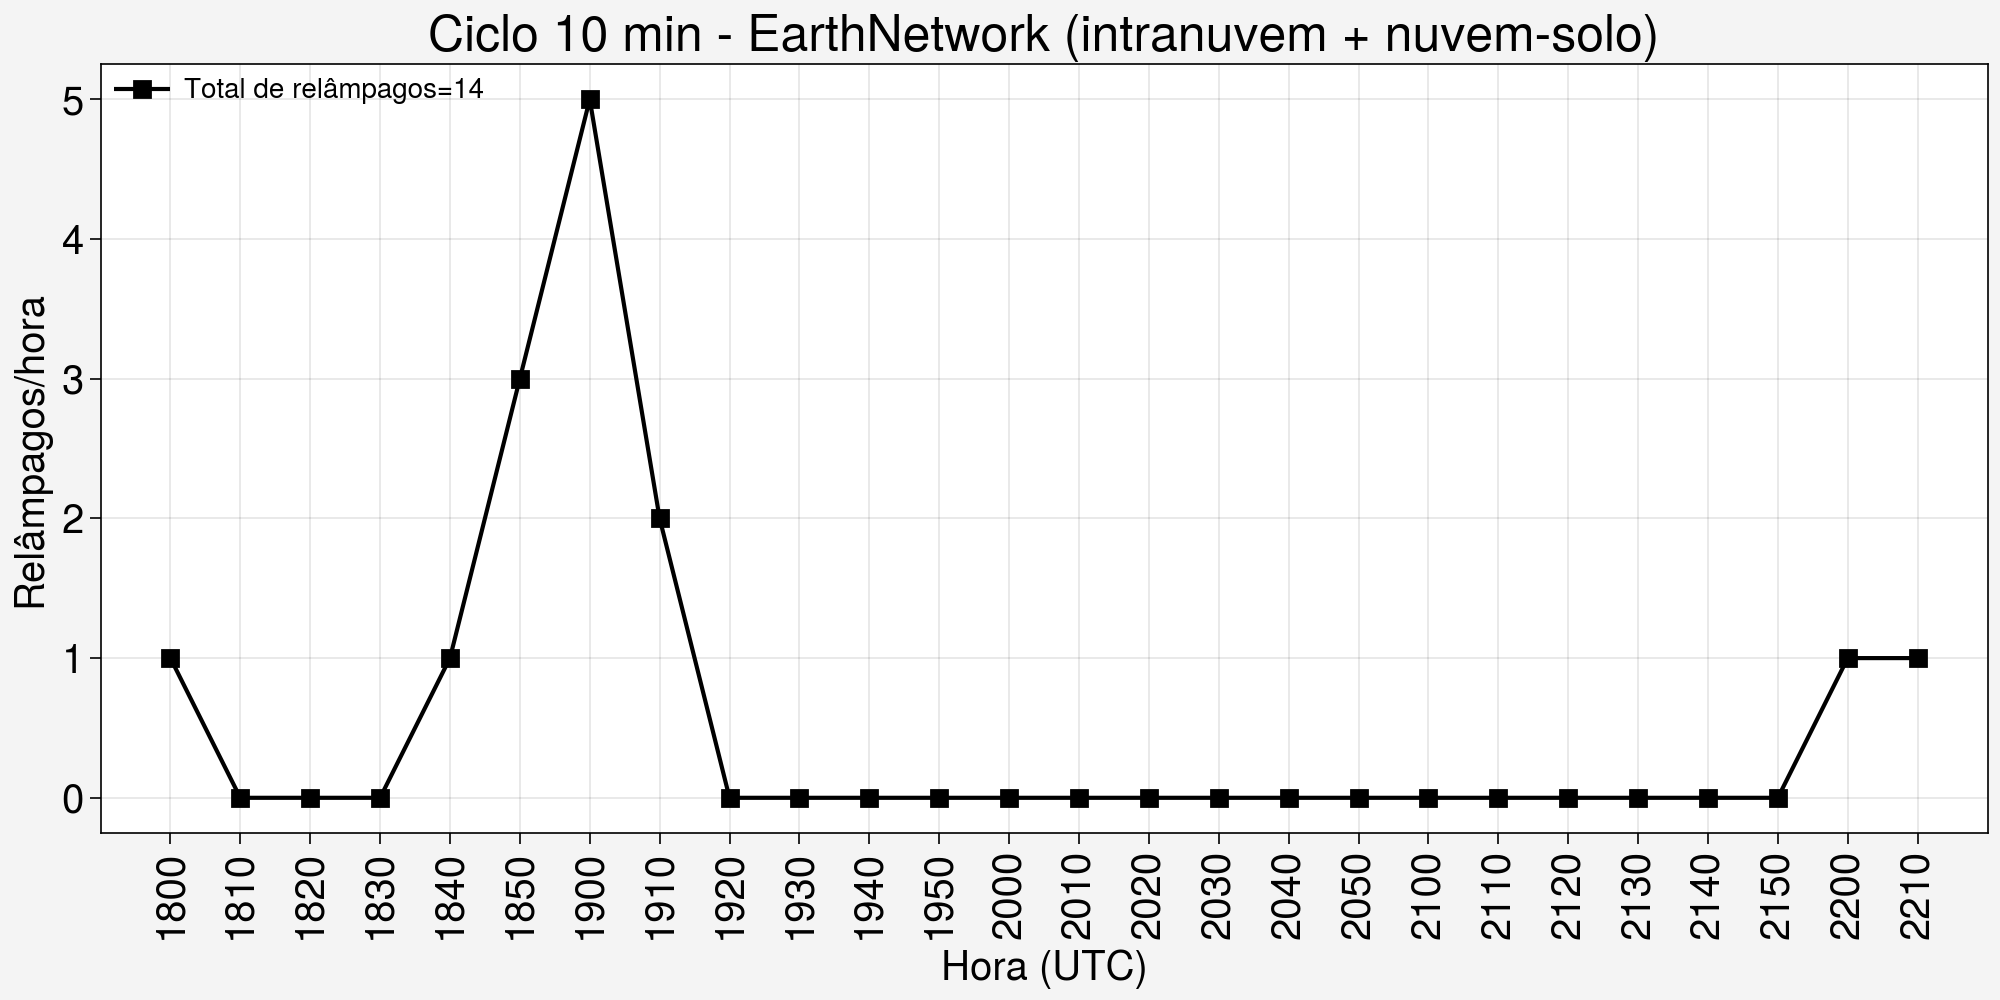

In [80]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5))

# plota gráfico de barras
ax.plot(pplt.arange(1, len(hormin), 1),
        df10min_tot.values,
        color='black',
        marker='s',
        label=f"Total de relâmpagos={df10min_tot.sum()}")

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Relâmpagos/hora',
          title='Ciclo 10 min - EarthNetwork (intranuvem + nuvem-solo)',
          xtickminor=False, ytickminor=False,
          small='20px', large='25px',
          xrotation=90,
          xticklabels=hormin,
          xticks=pplt.arange(1,len(hormin),1),
          xlim=(0,len(hormin)+1 ))

# adiona a legenda
ax.legend(ncols=1, frameon=False, loc='ul', prop={'size': 10})

# salva figura
fig.save(f'{dir}output/Fig2_ciclo_10min_total.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
pplt.show()

##**Plota figura**: IC e CG separados

In [81]:
# exibe o dado que será utilizado
df_ic_cg.head()

,ic,cg
data,,
2016-12-18 18:00:00,0.0,1.0
2016-12-18 18:10:00,0.0,0.0
2016-12-18 18:20:00,0.0,0.0
2016-12-18 18:30:00,0.0,0.0
2016-12-18 18:40:00,1.0,0.0


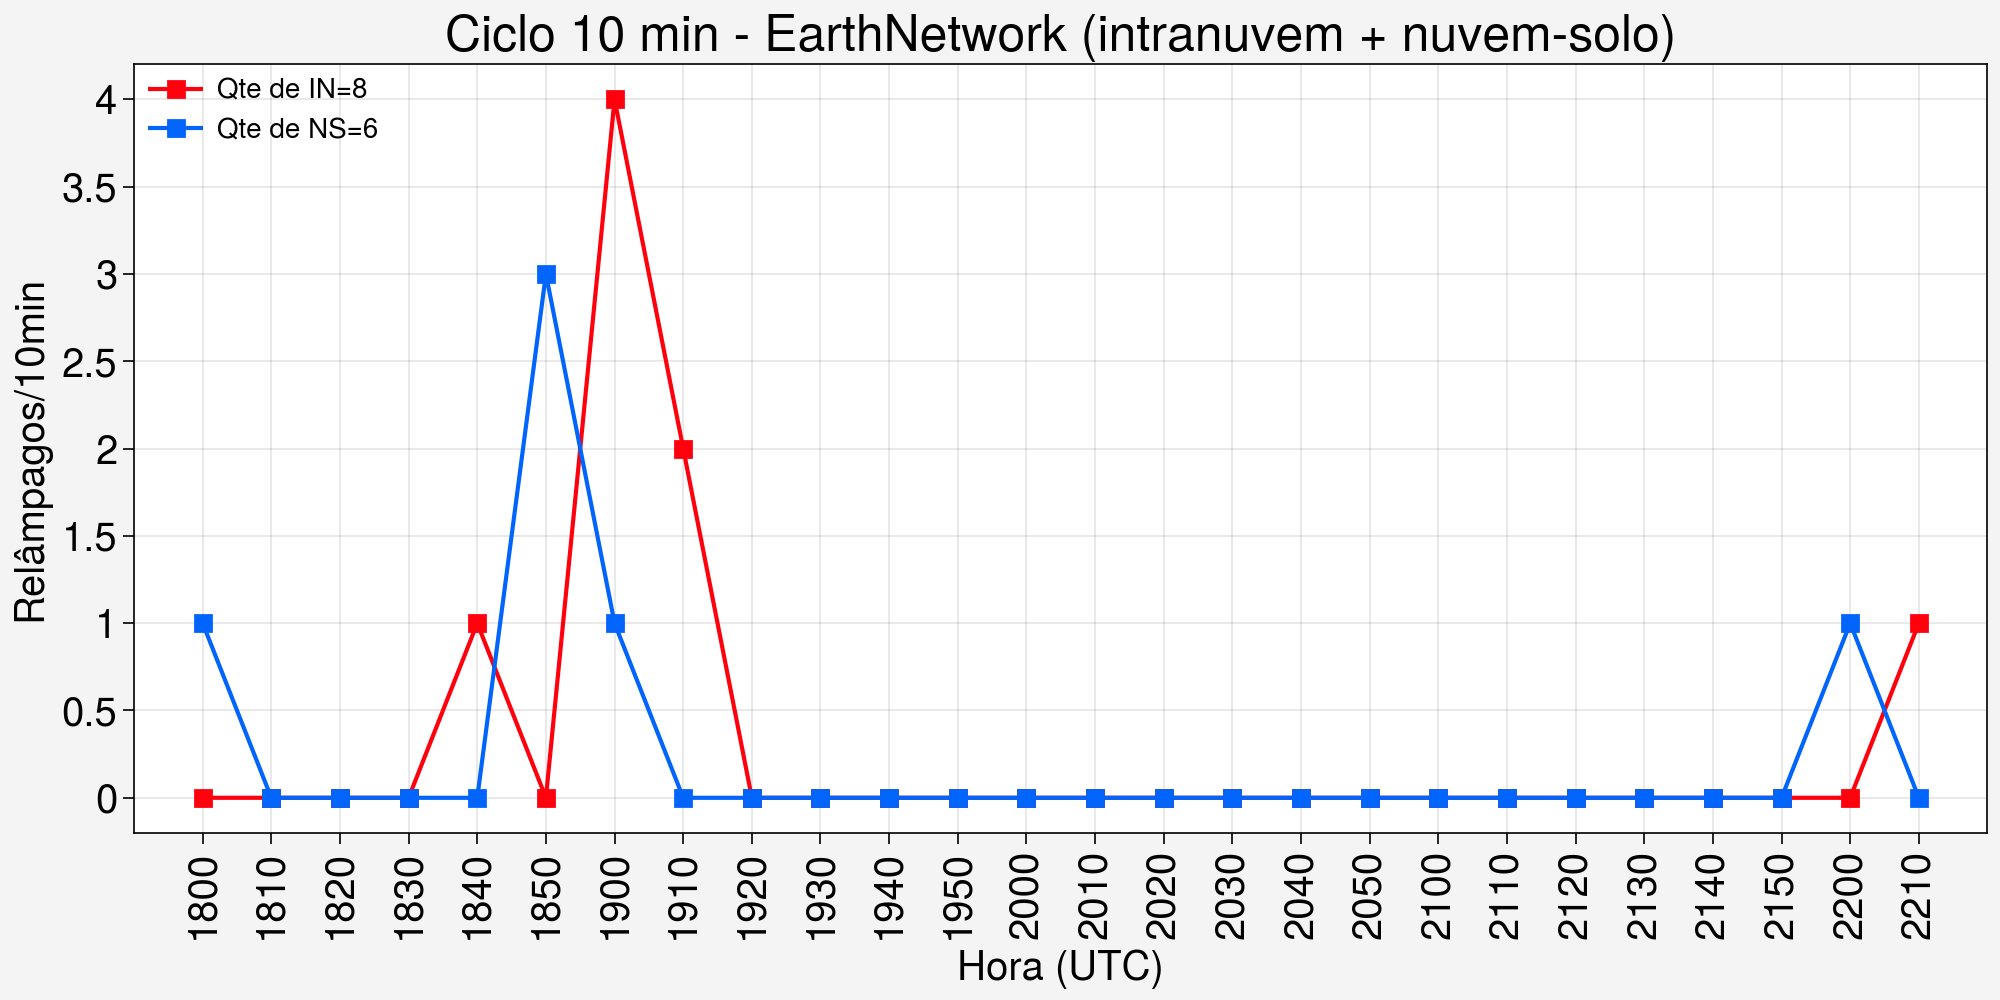

In [82]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5))

# plota gráfico de barras
ax.plot(pplt.arange(1, len(hormin), 1), df_ic_cg['ic'].values, color='bright red', marker='s', label=f"Qte de IN={df10min_ic.sum()}")
ax.plot(pplt.arange(1, len(hormin), 1), df_ic_cg['cg'].values, color='bright blue', marker='s', label=f"Qte de NS={df10min_cg.sum()}")

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Relâmpagos/10min',
          title='Ciclo 10 min - EarthNetwork (intranuvem + nuvem-solo)',
          xtickminor=False, ytickminor=False,
          small='20px', large='25px',
          xrotation=90,
          xticklabels=hormin,
          xticks=pplt.arange(1, len(hormin), 1),
          xlim=(0, len(hormin)+1 ))

# Adiona a legenda
ax.legend(ncols=1, frameon=False, loc='ul', prop={'size': 10})

# salva figura
fig.save(f'{dir}output/Fig3_ciclo_10min_IN_NS.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
pplt.show()